In [25]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd

In [19]:
#read nasdaq csv file in the same directory
nasdaq = pd.read_csv('nasdaq_screener.csv')
#print first 2 columns and 10 rows
nasdaq.iloc[:10, :2]


,Symbol,Name
0,A,Agilent Technologies Inc. Common Stock
1,AA,Alcoa Corporation Common Stock
2,AAC,Ares Acquisition Corporation Class A Ordinary ...
3,AACG,ATA Creativity Global American Depositary Shares
4,AACI,Armada Acquisition Corp. I Common Stock
5,AACIW,Armada Acquisition Corp. I Warrant
6,AADI,Aadi Bioscience Inc. Common Stock
7,AAIC,Arlington Asset Investment Corp Class A (new)
8,AAIC^B,Arlington Asset Investment Corp 7.00%
9,AAIC^C,Arlington Asset Investment Corp 8.250% Seies C...


In [20]:
#write only the first 2 columns to a new csv file named symbols.csv
nasdaq.iloc[:, :2].to_csv('symbols.csv')


In [21]:
#read the new csv file
symbols = pd.read_csv('symbols.csv')
symbols.head()


,Unnamed: 0,Symbol,Name
0,0,A,Agilent Technologies Inc. Common Stock
1,1,AA,Alcoa Corporation Common Stock
2,2,AAC,Ares Acquisition Corporation Class A Ordinary ...
3,3,AACG,ATA Creativity Global American Depositary Shares
4,4,AACI,Armada Acquisition Corp. I Common Stock


## Find the number of instances of the tickers in the data collected



import the updated CSV file for further research.

In [30]:
#import symbols from the csv file
symbols = pd.read_csv('symbols.csv')  
symbols.head()


,Symbol,Name
0,A,Agilent Technologies Inc. Common Stock
1,AA,Alcoa Corporation Common Stock
2,AAC,Ares Acquisition Corporation Class A Ordinary ...
3,AACG,ATA Creativity Global American Depositary Shares
4,AACI,Armada Acquisition Corp. I Common Stock


In [32]:
#find the row number of the symbol 'AAPL'
symbols[symbols['Symbol'] == 'AAPL']

,Symbol,Name
20,AAPL,Apple Inc. Common Stock


In [23]:
#import the hot text file to a list
hot = open('hot.txt').read().split('\n')
#count the number of items in the list
len(hot)

3768

In [24]:
#write the list to a new file names test_hot.txt
with open('test_hot.txt', 'w') as f:
    for item in hot:
        f.write("%s\n" % item)


In [8]:
#install skit-learn
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/18/36/60b58b6199547b7b46be03e05508d053162fbce146639bfc65609fa49b23/scikit_learn-1.3.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/db/8d/6419a5a65a538791f49d52cd8f8883bd11b41df0c9d35f500c9650f1e0b7/scipy-1.11.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.4 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/28/08/9dcdaa5aac4634e4c23af26d92121f7ce445c630efa0d3037881ae2407fb/joblib-1.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4

In [39]:
import re

In [41]:
symbols['Symbol'] = symbols['Symbol'].astype(str)
tickers = symbols['Symbol'].tolist()
sentences = sentences = ' '.join(map(str, hot))

ticker_counts = {}
for ticker in tickers:
    pattern = r"\b" + re.escape(ticker) + r"\b" # matches whole word
    count = len(re.findall(pattern, sentences)) 
    if count > 0:
        ticker_counts[ticker] = count

# Print the ticker counts
for ticker, count in ticker_counts.items():
    print(f"{ticker}: {count}")



A: 69
AAP: 1
AAPL: 10
ABCL: 2
ABNB: 1
ABST: 2
AC: 1
ADBE: 8
AI: 62
AKA: 1
ALL: 5
AM: 2
AMC: 9
AMD: 15
AMZN: 3
ANY: 5
AR: 1
ARE: 3
ASA: 1
ASML: 1
ASTS: 2
ATVI: 9
AVAV: 1
AVGO: 1
AVTR: 1
AZN: 2
BA: 2
BABA: 10
BAC: 4
BACK: 4
BB: 2
BIIB: 3
BKNG: 2
BLK: 2
BMBL: 1
BMO: 1
BMRN: 1
BNS: 1
BP: 1
BUD: 3
BY: 2
C: 1
CALM: 2
CAN: 1
CAVA: 2
CCL: 11
CD: 2
CIO: 1
CMA: 1
COF: 5
COIN: 6
COO: 2
CPE: 1
CRON: 3
CVNA: 15
CVS: 1
DAC: 2
DAL: 2
DB: 3
DD: 19
DG: 1
DMA: 2
DO: 6
DOCU: 1
DTE: 2
DV: 1
DWAC: 2
E: 5
ENPH: 3
ENVX: 1
ES: 18
ETN: 2
F: 10
FCF: 3
FDS: 1
FDX: 2
FGEN: 3
FIGS: 1
FLNG: 1
FR: 1
FREE: 1
FT: 2
FTCH: 1
G: 1
GAIN: 2
GF: 1
GM: 1
GME: 12
GO: 4
GOLD: 1
GOOGL: 3
GRND: 6
GTLS: 1
HAS: 2
HD: 2
HES: 2
HOOD: 5
INTC: 4
IONQ: 1
J: 8
JD: 2
KC: 1
KMX: 1
L: 1
LILM: 2
LL: 1
LOGI: 3
LQDA: 1
LULU: 3
LYFT: 1
MAT: 11
MCD: 1
MDT: 1
ME: 2
META: 23
MMM: 1
MO: 3
MPU: 2
MPW: 1
MSCI: 2
MSFT: 13
MVST: 1
NDAQ: 1
NEWR: 1
NEXT: 1
NFLX: 3
NHS: 2
NIO: 1
NKE: 4
NKLA: 9
NNDM: 2
NOW: 5
NVDA: 81
NVO: 3
OC: 1
ON: 2
OPEN: 3
OUT: 1
PAC

In [46]:
#store the results in a dataframe
ticker_df = pd.DataFrame.from_dict(ticker_counts, orient='index')
ticker_df.columns = ['count']

#find the top 10 most mentioned stocks
ticker_df.sort_values(by=['count'], ascending=False).head(60)

,count
NVDA,81
A,69
S,69
AI,62
TSLA,61
UBS,44
U,33
RIVN,29
META,23
DD,19


In [47]:

# Assuming you have imported the previous responses from a text file into a list called 'responses_list'
sentences = ' '.join(map(str, hot))  # Combine all sentences into a single string

# Create regular expressions for matching ticker symbols
patterns = [r"\b{}\b".format(re.escape(ticker)) for ticker in tickers]
patterns_with_dollar = [r"\${}\b".format(re.escape(ticker)) for ticker in tickers]

# Count the occurrences of each ticker using regular expressions
ticker_counts = {}
for ticker, pattern, pattern_with_dollar in zip(tickers, patterns, patterns_with_dollar):
    count = len(re.findall(pattern_with_dollar, sentences)) + len(re.findall(pattern, sentences))
    if count > 0:
        ticker_counts[ticker] = count

# Print the ticker counts
for ticker, count in ticker_counts.items():
    print(f"{ticker}: {count}")

A: 69
AAP: 2
AAPL: 16
ABCL: 2
ABNB: 2
ABST: 2
AC: 1
ADBE: 11
AI: 62
AKA: 1
ALL: 5
AM: 2
AMC: 9
AMD: 19
AMZN: 5
ANY: 5
AR: 1
ARE: 3
ASA: 1
ASML: 1
ASTS: 4
ATVI: 15
AVAV: 1
AVGO: 1
AVTR: 2
AZN: 2
BA: 2
BABA: 11
BAC: 4
BACK: 4
BB: 2
BIIB: 6
BKNG: 2
BLK: 3
BMBL: 2
BMO: 1
BMRN: 1
BNS: 1
BP: 1
BUD: 3
BY: 2
C: 1
CALM: 4
CAN: 1
CAVA: 2
CCL: 11
CD: 2
CIO: 1
CMA: 1
COF: 5
COIN: 7
COO: 2
CPE: 1
CRON: 6
CVNA: 21
CVS: 1
DAC: 2
DAL: 2
DB: 3
DD: 19
DG: 2
DMA: 2
DO: 6
DOCU: 1
DTE: 2
DV: 1
DWAC: 2
E: 5
ENPH: 3
ENVX: 2
ES: 18
ETN: 2
F: 10
FCF: 3
FDS: 2
FDX: 2
FGEN: 6
FIGS: 1
FLNG: 1
FR: 2
FREE: 1
FT: 2
FTCH: 1
G: 1
GAIN: 2
GF: 1
GM: 1
GME: 15
GO: 4
GOLD: 1
GOOGL: 6
GRND: 6
GTLS: 1
HAS: 4
HD: 3
HES: 2
HOOD: 10
INTC: 4
IONQ: 1
J: 8
JD: 2
KC: 1
KMX: 1
L: 1
LILM: 4
LL: 1
LOGI: 4
LQDA: 1
LULU: 3
LYFT: 2
MAT: 22
MCD: 2
MDT: 1
ME: 2
META: 39
MMM: 2
MO: 6
MPU: 2
MPW: 1
MSCI: 2
MSFT: 18
MVST: 1
NDAQ: 1
NEWR: 2
NEXT: 1
NFLX: 3
NHS: 2
NIO: 1
NKE: 4
NKLA: 16
NNDM: 2
NOW: 5
NVDA: 96
NVO: 3
OC: 1
ON: 2
OPEN: 6
OUT: 1

In [52]:
import pandas as pd
import re

# Read the text file
with open('hot.txt', 'r') as file:
    lines = file.readlines()

# Create empty lists to store dates and corresponding text
dates = []
text_data = []

# Define the regex pattern to match the date and time format in the first line
date_pattern = r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}'

# Loop through the lines and extract dates and text
for line in lines:
    # Check if the line contains a date and time using regex
    if re.match(date_pattern, line.strip()):
        # If the line contains a date, store it in the dates list
        dates.append(line.strip())
    else:
        # If the line does not contain a date, store it in the text_data list
        text_data.append(line.strip())

# Create a pandas dataframe from the extracted data
data = {'Date': dates, 'Text': text_data}
df = pd.DataFrame(data)

# Display the dataframe
print(df)

ValueError: All arrays must be of the same length

In [56]:
import pandas as pd
import re

# Read the text file
with open('hot.txt', 'r') as file:
    lines = file.readlines()

# Create empty lists to store dates and corresponding text
dates = []
text_data = []

# Define the regex pattern to match the date and time format in the first line
date_pattern = r'[-]+(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2})'

# Loop through the lines and extract dates and text
for line in lines:
    # Check if the line contains a date and time using regex
    if re.match(date_pattern, line.strip()):
        # If the line contains a date, store it in the dates list
        dates.append(line.strip())
    else:
        # If the line does not contain a date, store it in the text_data list
        text_data.append(line.strip())

# Determine the maximum length of text data
max_length = max(len(dates), len(text_data))

# Pad the shorter lists with a placeholder value (e.g., 'N/A')
dates += ['N/A'] * (max_length - len(dates))
text_data += ['N/A'] * (max_length - len(text_data))

# Create a pandas dataframe from the extracted data
data = {'Date': dates, 'Text': text_data}
df = pd.DataFrame(data)

# Display the dataframe
df.head()


,Date,Text
0,----------------------------------------------...,
1,----------------------------------------------...,"What Are Your Moves Tomorrow, March 16, 2023"
2,----------------------------------------------...,Most Anticipated Earnings Releases for the wee...
3,----------------------------------------------...,Eggon says “GME go up” after earnings. ⬆️
4,----------------------------------------------...,Goldman Sachs: 99% of borrowers have a mortgag...


# Stocks

In [4]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/c8/97/20c8095d492859010867bdad1c92637e62e5b9308c5e45f0caac56e12e42/yfinance-0.2.24-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pandas>=1.3.0 from https://files.pythonhosted.org/packages/8f/bb/aea1fbeed5b474cb8634364718abe9030d7cc7a30bf51f40bd494bbc89a2/pandas-2.0.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for numpy>=1.16.5 from https://files.pythonhosted.org/packages/48/73/df07644e8fa1127a7985db70cf1d07123004e2dd7a3cf33e8b83297a775b/numpy-1.25.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for requests>=2.26 from https://files.pythonhosted.org/packages/70/8e/0e2d847013cb52cd35b38c009bb167a1a26b2ce6cd6965bf26b47bc0bf44/requests-2.31.0-py3-none-any.whl.metadata
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Obtaining dependency information for lxml>=4.9.1 from https://files.pythonhosted.

In [48]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/f6/22/9c31044ff7339c63727a135872e5cb59564f11625372a81c3eebf148f4af/matplotlib-3.7.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/88/e3/696e96ee197b1f60242d12b215332af9fc1961c81990c8b5630b89b34ce6/contourpy-1.1.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/e3/a6/5e8c6dfd239fe281b1aa9408a7d681e82182295fb87d05e086e1e2fd376c/fonttools-4.41.0-cp311-cp311-macosx_10_9_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 2.9 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.4-cp311-cp311-macosx_11_0_arm64.whl (63 kB)
  Obtaining dependency information for pillow>=6.2.0 from https://files.pythonhosted.org/packages/

In [49]:
import yfinance as yf
import matplotlib.pyplot as plt


<Axes: title={'center': "NVDA's stock price"}, xlabel='Date'>

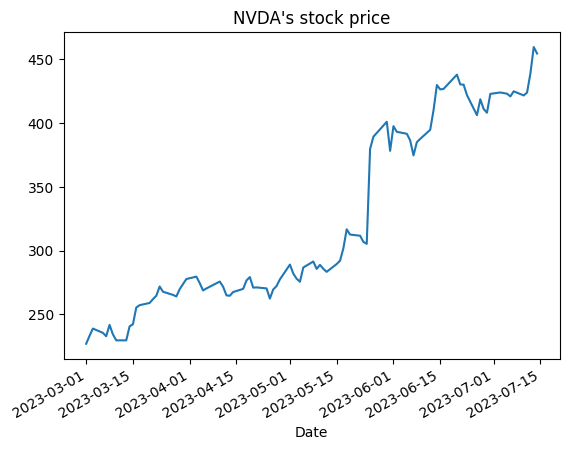

In [50]:
#get stock data on NVDA for the months of march 2023 to july 2023
nvda = yf.download('NVDA', start='2023-03-01', end='2023-07-31', progress=False)

nvda.head()

#plot the closing price of NVDA
nvda['Close'].plot(title="NVDA's stock price")



<Axes: title={'center': "AAPL's stock price"}, xlabel='Date'>

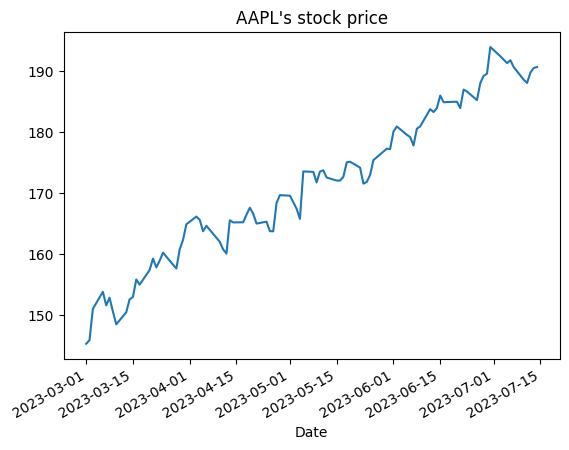

In [51]:
#get stock data on NVDA for the months of march 2023 to july 2023
aapl = yf.download('AAPL', start='2023-03-01', end='2023-07-31', progress=False)

aapl.head()

#plot the closing price of NVDA
aapl['Close'].plot(title="AAPL's stock price")
